In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.decomposition import PCA
import scipy.optimize as op
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
### import Feature Selection Techniques
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2, f_classif

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-machine-learning-from-disaster/train.csv
/kaggle/input/titanic-machine-learning-from-disaster/test.csv
/kaggle/input/aug-train/aug_train.csv


# Exploratory Data Analysis

<AxesSubplot:>

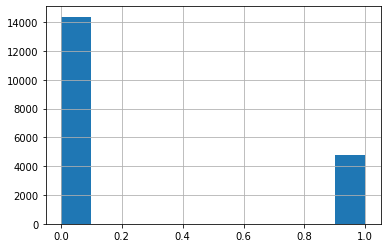

In [2]:
df = pd.read_csv('../input/aug-train/aug_train.csv')
df.isnull().sum(), df.describe()
df.shape, df.size
df['target'].hist()

In [3]:
class Preprocess_Visualization():
    def __init__(self,df):
        self.df = df
        
    def _get_numerical_columns(self):
        return self.df.select_dtypes(include=['float64','int64']).columns
        
    def _get_categorical_columns(self):
        return self.df.select_dtypes(include=['object']).columns
    
    def _remove_columns(self,labels):
        self.df.drop(labels=labels,axis=1,inplace=True)
    
    def _drop_rows_with_null(self):
        self.df.dropna(inplace=True)
    
    def _scale_numerical_features(self):
        scaler = preprocessing.StandardScaler()
        numerical_cols = self._get_numerical_columns()
        numerical_df = pd.DataFrame(self.df,columns=numerical_cols)
        scaler.fit(numerical_df)
        scaled_cols = scaler.transform(numerical_df)
        self.df[numerical_cols] = scaled_cols
    
    def _label_encode_categories(self):
        le = preprocessing.LabelEncoder()
        categorical_cols = self._get_categorical_columns()
        categorical_df = pd.DataFrame(self.df,columns=categorical_cols)
        categorical_df = categorical_df.apply(le.fit_transform)
        self.df[categorical_cols] = categorical_df
        
    
    def perform_wrangling(self):
        self._remove_columns(['enrollee_id','target'])
        self._drop_rows_with_null()
        self._scale_numerical_features()
        self._label_encode_categories()
        return self.df
        

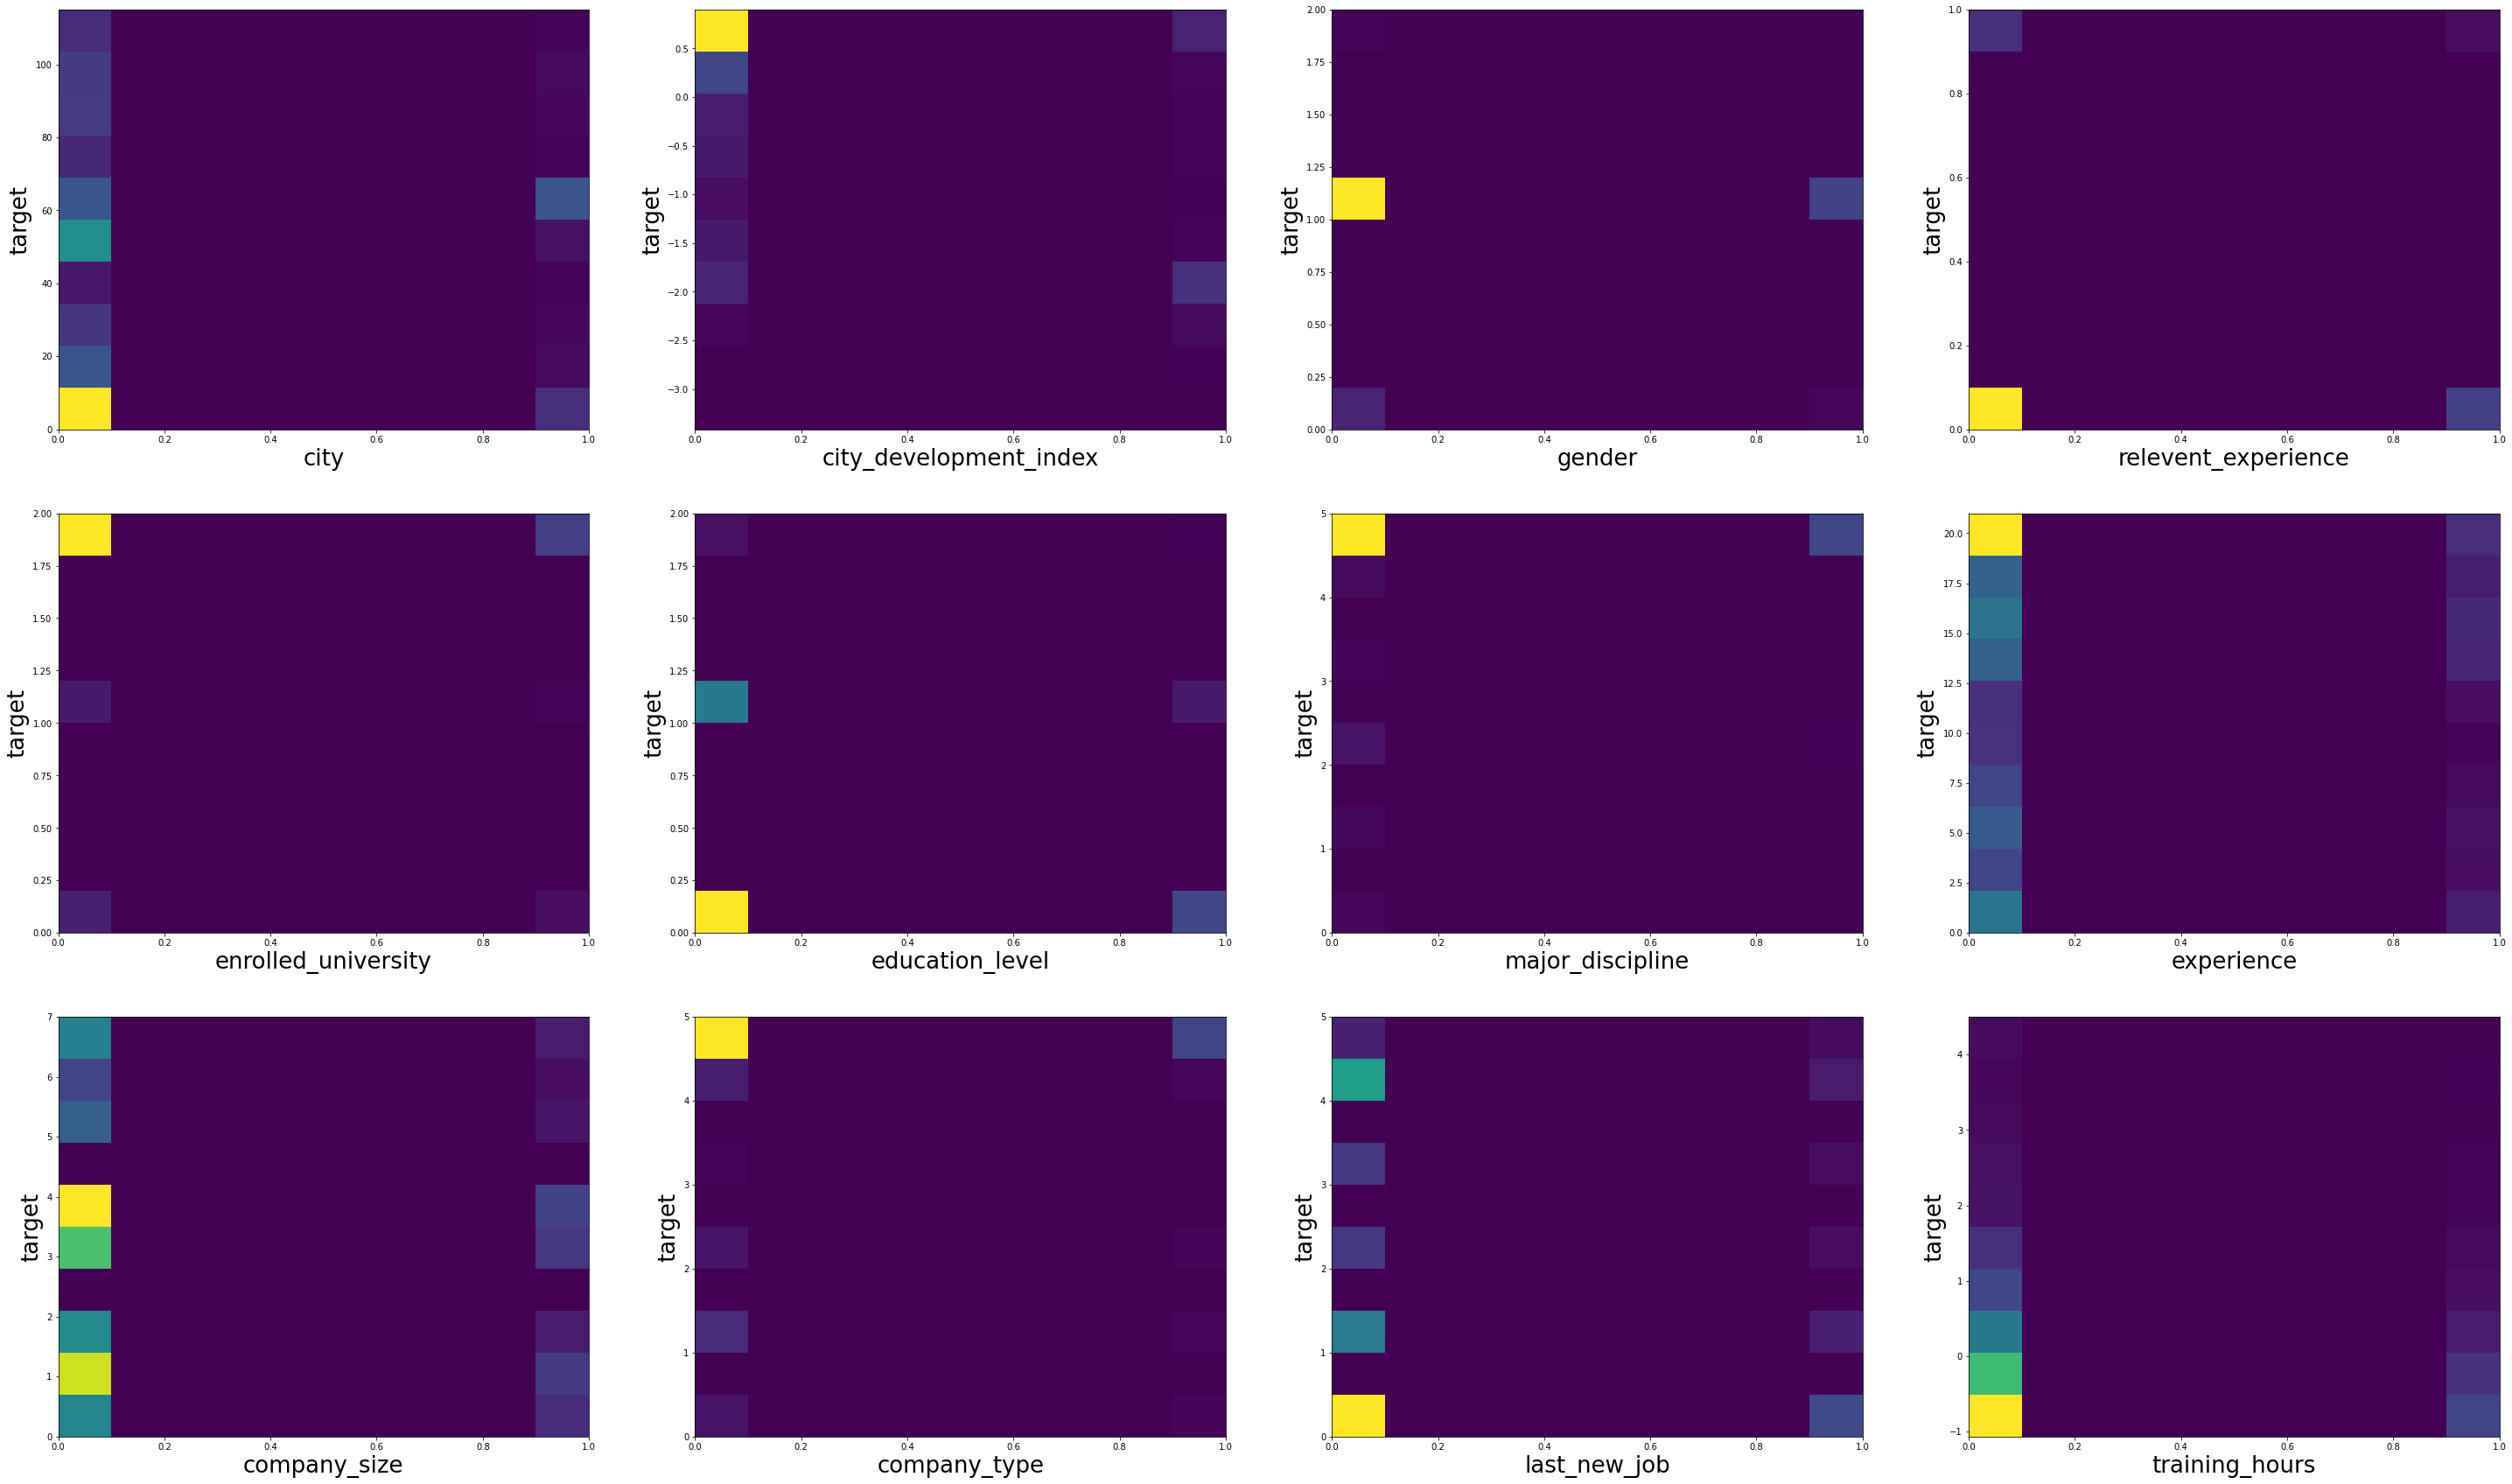

In [4]:
raw_df = pd.read_csv('../input/aug-train/aug_train.csv')
df_1 = pd.read_csv('../input/aug-train/aug_train.csv')
df_1.dropna(inplace=True)
vis_data_prep = Preprocess_Visualization(raw_df)
vis_data = vis_data_prep.perform_wrangling()
figure = plt.figure(figsize=(50, 30))
i=1
for col in vis_data.columns:
    ax = plt.subplot(3, 4, i)
    ax.hist2d(df_1.loc[:,'target'], vis_data.loc[:,col])
    plt.ylabel('target',fontsize=26)
    plt.xlabel(col,fontsize=26)
    i +=1

In [5]:
## Data Preprocessing

**Perform Data Wrangling**
* Handle NA / null values : Drop null values
* For numerical columns : Perform Feature scaling
* For categorical columns : Perform label encoding

In [6]:

class DataWrangler_Approach_A():
    def __init__(self,df):
        self.df = df
        
    def _get_numerical_columns(self):
        return self.df.select_dtypes(include=['float64','int64']).columns
        
    def _get_categorical_columns(self):
        return self.df.select_dtypes(include=['object']).columns
    
    def _remove_columns(self,labels):
        self.df.drop(labels=labels,axis=1,inplace=True,errors='ignore')

    
    def _drop_rows_with_null(self):
        self.df.dropna(inplace=True)
    
    def _scale_numerical_features(self):
        scaler = preprocessing.StandardScaler()
        numerical_cols = self._get_numerical_columns()
        numerical_df = df.loc[:,numerical_cols]
        self.df.drop(labels=numerical_cols, axis=1, inplace=True)
        scaler.fit(numerical_df)
        scaled_cols = scaler.transform(numerical_df)
        self.df[numerical_cols] = scaled_cols
    
    def _label_encode_categories(self):
        le = preprocessing.LabelEncoder()
        categorical_cols = self._get_categorical_columns()
        categorical_df = df.loc[:,categorical_cols]
        categorical_df = categorical_df.apply(le.fit_transform)
        self.df[categorical_cols] = categorical_df
        
    
    def perform_wrangling(self):
        self._remove_columns(['enrollee_id','target'])
        self._drop_rows_with_null()
        self._scale_numerical_features()
        self._label_encode_categories()
        dropna=True
        return (self.df,dropna)
        

**Perform Data Wrangling Approach B**
* Handle NA / null values : Impute the null fields, Do not drop
* For numerical columns : Perform Feature scaling
* For categorical columns : Perform label encoding

In [7]:

class DataWrangler_Approach_B():
    def __init__(self,df):
        self.df = df
        
    def _get_numerical_columns(self):
        return df.select_dtypes(include=['float64','int64']).columns
        
    def _get_categorical_columns(self):
        return df.select_dtypes(include=['object']).columns
    
    def _remove_columns(self,labels):
        self.df.drop(labels=labels,axis=1,inplace=True,errors='ignore')
    
    def _scale_numerical_features(self):
        scaler = preprocessing.StandardScaler()
        numerical_cols = self._get_numerical_columns()
        numerical_df = df.loc[:,numerical_cols]
        scaler.fit(numerical_df)
        scaled_cols = scaler.transform(numerical_df)
        self.df[numerical_cols] = scaled_cols
    
    def _label_encode_categories(self):
        imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        le = preprocessing.LabelEncoder()
        categorical_cols = self._get_categorical_columns()
        categorical_df = df.loc[:,categorical_cols]
        imputer.fit(categorical_df)
        imputed_arr = imputer.transform(categorical_df)
        categorical_df = pd.DataFrame(imputed_arr,columns = categorical_cols)
        categorical_df = categorical_df.apply(le.fit_transform)
        self.df[categorical_cols] = categorical_df
        
    
    def perform_wrangling(self):
        self._remove_columns(['enrollee_id','target'])
        self._scale_numerical_features()
        self._label_encode_categories()
        dropna=False
        return (self.df,dropna)

# Feature Selection Techniques

In [8]:
class Feature_Selection():
    def __init__(self,df):
        self.df = df
        
    def _get_numerical_columns(self):
        return df.select_dtypes(include=['float64','int64']).columns
        
    def _get_categorical_columns(self):
        return df.select_dtypes(include=['object']).columns
    
    def _remove_columns(self,labels):
        self.df.drop(labels=labels,axis=1,inplace=True,errors='ignore')
    
    def _label_encode_categories(self):
        imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        le = preprocessing.LabelEncoder()
        categorical_cols = self._get_categorical_columns()
        categorical_df = df.loc[:,categorical_cols]
        imputer.fit(categorical_df)
        imputed_arr = imputer.transform(categorical_df)
        categorical_df = pd.DataFrame(imputed_arr,columns = categorical_cols)
        categorical_df = categorical_df.apply(le.fit_transform)
        self.df[categorical_cols] = categorical_df
        
    
    def perform_wrangling(self):
        self._remove_columns(['enrollee_id','target'])
        self._label_encode_categories()
        dropna=False
        return (self.df,dropna)

# Classfier Training & Evaluation Without Feature Selection
**Preprocessing Approach used**
* Handle NA / null values : Drop null values
* For numerical columns : Perform Feature scaling
* For categorical columns : Perform label encoding

**Classifiers Used**
* RandomForest
* Decision Tree
* AdaBoost

RandomForest Accuracy = 0.8530594015185351
DecisionTree Accuracy = 0.8387673068334077
AdaBoost Accuracy = 0.8584189370254578
Nearest Neighbors Accuracy = 0.839213934792318
LogisticRegression Accuracy = 0.8459133541759715


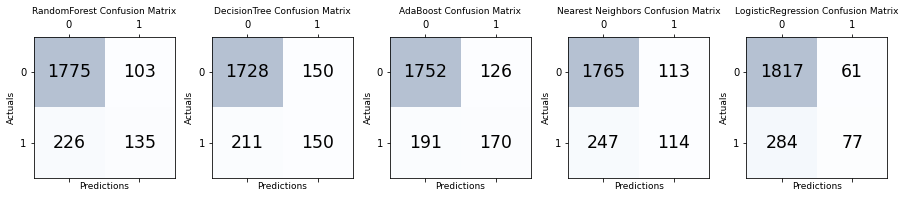

In [9]:
raw_df = pd.read_csv('../input/aug-train/aug_train.csv')
df = pd.read_csv('../input/aug-train/aug_train.csv')

classifiers = [
     RandomForestClassifier(n_estimators=100)
    ,DecisionTreeClassifier(max_depth=10)
    ,AdaBoostClassifier()
    ,KNeighborsClassifier(3)
    ,LogisticRegression(solver='liblinear')
]
names = ['RandomForest','DecisionTree','AdaBoost','Nearest Neighbors','LogisticRegression']

figure = plt.figure(figsize=(15, 5))
# Perform Pre-processing to input features
(preprocessed_df,dropna) = DataWrangler_Approach_A(df).perform_wrangling()
# Perform Preprocessing to dependent variable
if dropna:
    raw_df.dropna(inplace=True)
y = raw_df.loc[:,'target']
# Split the data for train & test
X_train, X_test, y_train, y_test = train_test_split(preprocessed_df, y,random_state=42)
index = 1
for name,classifier in zip(names,classifiers):
    # Train the classifier
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    accuracy = classifier.score(X_test, y_test)
    print(f'{name} Accuracy = {accuracy}')
    # Draw confusion Matrix 
    conf_matrix = metrics.confusion_matrix(y_test, y_pred)
    ax = plt.subplot(2,len(classifiers)+1,index)
    ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
            pass
    plt.xlabel('Predictions', fontsize=9)
    plt.ylabel('Actuals', fontsize=9)
    plt.title(f'{name} Confusion Matrix', fontsize=9)
    index += 1
plt.tight_layout()
plt.show()

**Preprocessing Approach used**
* Handle NA / null values : Impute the null fields, Do not drop
* For numerical columns : Perform Feature scaling
* For categorical columns : Perform label encoding

**Classifiers Used**
* RandomForest
* Decision Tree
* AdaBoost

RandomForest Accuracy = 0.7699373695198329
DecisionTree Accuracy = 0.7699373695198329
AdaBoost Accuracy = 0.7718162839248435
Nearest Neighbors Accuracy = 0.7192066805845512
LogisticRegression Accuracy = 0.7540709812108559


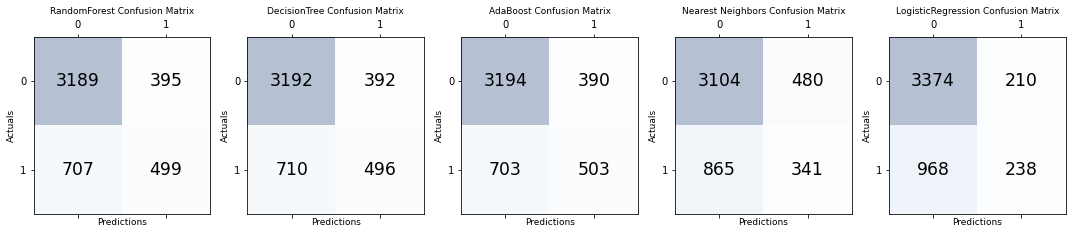

In [10]:
raw_df = pd.read_csv('../input/aug-train/aug_train.csv')
df = pd.read_csv('../input/aug-train/aug_train.csv')

classifiers = [
     RandomForestClassifier(n_estimators=100)
    ,DecisionTreeClassifier(max_depth=10)
    ,AdaBoostClassifier()
    ,KNeighborsClassifier(3)
    ,LogisticRegression(solver='liblinear')
]
names = ['RandomForest','DecisionTree','AdaBoost','Nearest Neighbors','LogisticRegression']

figure = plt.figure(figsize=(15, 5))
# Perform Pre-processing to input features
(preprocessed_df,dropna) = DataWrangler_Approach_B(df).perform_wrangling()
# Perform Preprocessing to dependent variable
if dropna:
    raw_df.dropna(inplace=True)
y = raw_df.loc[:,'target']
# Split the data for train & test
preprocessed_df = SelectKBest(f_classif, k=2).fit_transform(preprocessed_df,y)
X_train, X_test, y_train, y_test = train_test_split(preprocessed_df, y,random_state=42)
index = 1
for name,classifier in zip(names,classifiers):
    # Train the classifier
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    accuracy = classifier.score(X_test, y_test)
    print(f'{name} Accuracy = {accuracy}')
    # Draw confusion Matrix 
    conf_matrix = metrics.confusion_matrix(y_test, y_pred)
    ax = plt.subplot(1,len(classifiers),index)
    ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
            pass
    plt.xlabel('Predictions', fontsize=9)
    plt.ylabel('Actuals', fontsize=9)
    plt.title(f'{name} Confusion Matrix', fontsize=9)
    index += 1
plt.tight_layout()
plt.show()

# Classfier Training & Evaluation With Feature Selection
**Preprocessing Approach used**
* Handle NA / null values : Drop null values
* Feature Selection Techniques used : 
    * SelectKBest 
        * chi
        * f_classif
* For categorical columns : Perform label encoding

**Classifiers Used**
* RandomForest
* Decision Tree
* AdaBoost

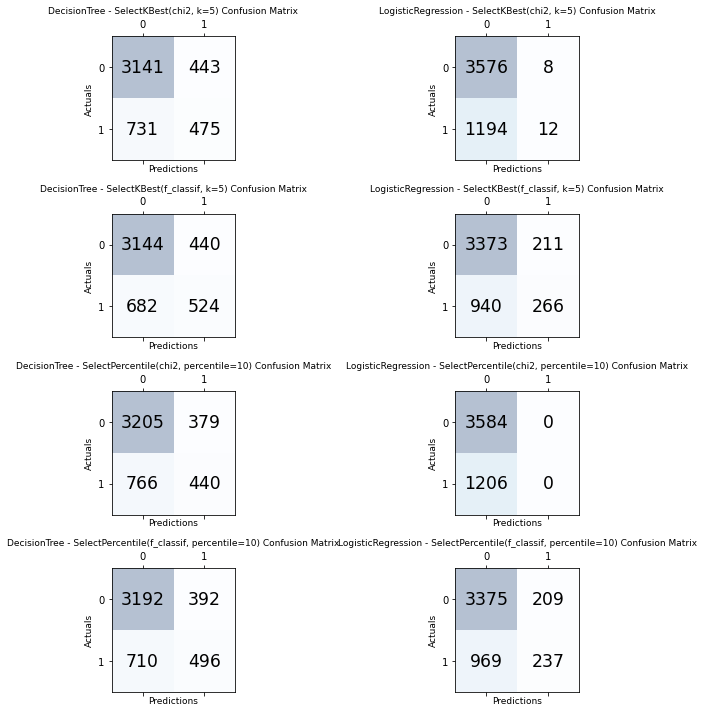

In [11]:
raw_df = pd.read_csv('../input/aug-train/aug_train.csv')
df = pd.read_csv('../input/aug-train/aug_train.csv')

classifiers = [
#      RandomForestClassifier(n_estimators=100)
#     ,AdaBoostClassifier()
#     ,KNeighborsClassifier(3)
#     ,
    DecisionTreeClassifier(max_depth=10)
    ,LogisticRegression(solver='liblinear')
]
feature_selectors = [
     SelectKBest(chi2, k=5)
    ,SelectKBest(f_classif, k=5)
    ,SelectPercentile(chi2, percentile=10)
    ,SelectPercentile(f_classif, percentile=10)
]
selector_names = [
    'SelectKBest(chi2, k=5)'
    ,'SelectKBest(f_classif, k=5)'
    ,'SelectPercentile(chi2, percentile=10)'
    ,'SelectPercentile(f_classif, percentile=10)'
]
#names = ['RandomForest','DecisionTree','AdaBoost','Nearest Neighbors','LogisticRegression']
names = ['DecisionTree','LogisticRegression']

figure = plt.figure(figsize=(15, 10))
# Perform Pre-processing to input features
(preprocessed_df,dropna) = Feature_Selection(df).perform_wrangling()
# Perform Preprocessing to dependent variable
if dropna:
    raw_df.dropna(inplace=True)
y = raw_df.loc[:,'target']
# Split the data for train & test
index=1

for sel_name,selector in zip(selector_names,feature_selectors):
    #ax = plt.subplot(len(feature_selectors),len(classifiers)+1,index)
    X = selector.fit_transform(preprocessed_df,y)
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)
    index += 1
    for name,classifier in zip(names,classifiers):
        # Train the classifier
        classifier.fit(X_train,y_train)
        y_pred = classifier.predict(X_test)
        accuracy = classifier.score(X_test, y_test)
        #print(f'{name} Accuracy = {accuracy}')
        # Draw confusion Matrix 
        conf_matrix = metrics.confusion_matrix(y_test, y_pred)
        ax = plt.subplot(len(feature_selectors),len(classifiers)+1,index)
        ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
        for i in range(conf_matrix.shape[0]):
            for j in range(conf_matrix.shape[1]):
                ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
        plt.xlabel('Predictions', fontsize=9)
        plt.ylabel('Actuals', fontsize=9)
        plt.title(f'{name} - {sel_name} Confusion Matrix', fontsize=9)
        index += 1
plt.tight_layout()
plt.show()

# Ignore

(19158, 12)
RandomForest Accuracy = 0.761169102296451
DecisionTree Accuracy = 0.7582463465553236
AdaBoost Accuracy = 0.7722338204592902
Nearest Neighbors Accuracy = 0.7315240083507307


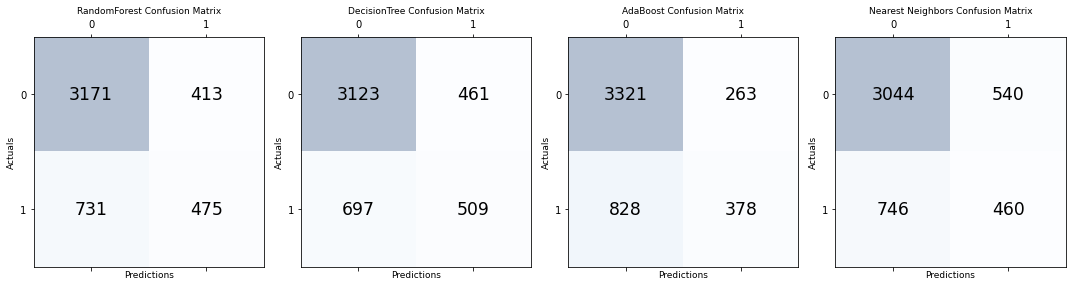

In [12]:
from sklearn.decomposition import PCA


raw_df = pd.read_csv('../input/aug-train/aug_train.csv')
df = pd.read_csv('../input/aug-train/aug_train.csv')

classifiers = [
     RandomForestClassifier(n_estimators=100)
    ,DecisionTreeClassifier(max_depth=10)
    ,AdaBoostClassifier()
    ,KNeighborsClassifier(3)
]
names = ['RandomForest','DecisionTree','AdaBoost','Nearest Neighbors']

figure = plt.figure(figsize=(15, 5))
# Perform Pre-processing to input features
(preprocessed_df,dropna) = DataWrangler_Approach_B(df).perform_wrangling()
pca = PCA(n_components=12,svd_solver='full')
X_train = pca.fit_transform(preprocessed_df)
print(X_train.shape)
y = raw_df.loc[:,'target']
# Split the data for train & test
X_train, X_test, y_train, y_test = train_test_split(preprocessed_df, y,random_state=42)
index = 1
for name,classifier in zip(names,classifiers):
    # Train the classifier
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    accuracy = classifier.score(X_test, y_test)
    print(f'{name} Accuracy = {accuracy}')
    # Draw confusion Matrix 
    conf_matrix = metrics.confusion_matrix(y_test, y_pred)
    ax = plt.subplot(1,len(classifiers),index)
    ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
            pass
    plt.xlabel('Predictions', fontsize=9)
    plt.ylabel('Actuals', fontsize=9)
    plt.title(f'{name} Confusion Matrix', fontsize=9)
    index += 1
plt.tight_layout()
plt.show()